In [1]:
# importing some packages to help with certain functions
import pandas as pd
from numpy import mean
from numpy import std


# download the dataset 
!wget https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/labs/lab4/housing_subset.csv

# download some helper functions in order to assist with plotting
!wget https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/functions.py

# download additional assets for this lab
!wget https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/labs/lab4/lab4.py

from functions import *
from lab4 import *

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# **Lab 4: Correlation and Linear Regression**

In this week's lab you'll work more with Python, using it to write some functions to calculate the correlation between two variables.

In addition, you'll get a chance to implement the analytical method of simple linear regression and also use some Python packages to implement the numerical method. There is also an additional section which introduces multiple linear regression, where you can use two or more variables to make predictions on an outcome. 

In this lab we will work with Housing Data drawn from a subset of the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. In the following cell we read the data into the housing variable.

In [2]:
housing = pd.read_csv('housing_subset.csv')
housing

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...
485,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,22.4
486,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,20.6
487,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,23.9
488,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,22.0


Here is a description of the columns: 
* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **TAX** - full-value property-tax rate per \$10,000
* **PTRATIO** - pupil-teacher ratio by town
* **MEDV** - Median value of owner-occupied homes in \$1000's


The goal of this dataset is to be able to predict the "MEDV" variable. For example, if we were given a town with a certain set of characteristics, we want to know what might be the median value of the homes in that town. 

# 1. Correlation

For now, let's just focus on two of the columns, the average number of rooms per dwelling, and our outcome variable, the median house value. Intuitively, it makes sense that more houses means more money, you can imagine that a town of mansions would have a pretty high median house value. 

Run the following cell to look at the scatterplot of the two variables we have created for you. In this section, you will write code to calculate the correlation coefficient, _r_ of any pair of data. 

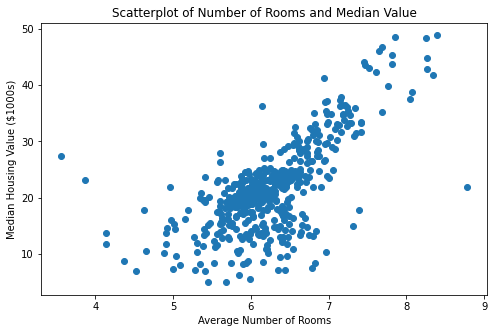

In [45]:
# code for plotting scatter plot

rooms = housing['rm']
median_value = housing['medv']

fig1, ax1 = plot_scatter(rooms, 
    median_value, 
    x_label = "Average Number of Rooms",
    y_label = 'Median Housing Value ($1000s)',
    title = 'Scatterplot of Number of Rooms and Median Value');

In the last lab, you wrote code to calculate mean and standard deviation of an array of data, as well as code to convert an array into standard units. We've imported some functions for you to use this time so that you won't have to go through the hassle of defining the functions all over again. Please use the following functions for your convenience (you don't have to though!):

`mean(an_array): returns the mean of an array` 


`std(an_array): returns the standard deviation of an array`

`standardize(an_array): returns the array with its elements converted to standard units`


## Question 1.a

Let's calculate the correlation coefficient between the number of rooms and the median housing value. Remember from lecture that the correlation coefficient as calculated as follows, where $x$ and $y$ are our pairs of data.: 

$$\text{Average of the product of }x \text{ in standard units and } y \text{ in standard units}$$


Instead of walking you through all the steps like we did last time, you now know how to write functions! Write the function `corr` that computes the correlation coefficient between two columns of data. It should take in two inputs, each of them arrays of the same length with indices corresponding to the same observations. Run the following cell to see if your function is correct.

_Hint: First, convert data to standard units using the `standardize` function. Next, find the element-wise product between all of the entires._

_Hint: Element-wise product means that we want to multiple the value in each index of an array by the corresponding value in that **same** index in another array. Luckily, this is the default when working with arrays_ 

In [40]:
def corr(array_1, array_2):
    """Calculate the correlation between two sets of matched data"""
    # Your Code Here ...
    ...
    r = ...
    return r 

In [ ]:
check('q1a', corr)

Now that you have a function that gets the correlation coefficient for you, we can immediately start getting into linear regression! In the next part you will do a little algebra and solve for some missing part in equations to get the full equation of the line of best fit for these two variables.

## Question 1.b

Now we'll use your `corr` function to create another function to solve for all of the parts of the line of best fit from linear regression. Remember that the components of the line of best fit can be extracted from the following equation: 

$$\text{Estimate of $y$ in standard units} = r \times \text{Predictor $x$ in standard units}$$

Replacing the definition of standard units, we have the following equation:

$$\frac{\text{Estimate of } y - \text{Average of } y}{\text{SD of }y} = r \times \frac{\text{Predictor } x - \text{Average of } x}{\text{SD of }x}$$

After moving some terms around, we can arrive at the following equation for our estimate of $y$:

$$\text{Estimate of $y$} = \frac{\text{SD of $y$}}{\text{SD of $x$}}\times r \times x + \left(\text{Average of $y$} - \frac{\text{SD of $y$}}{\text{SD of $x$}}\times r \times \text{Average of $x$}\right)$$

Which you can see, is exactly in the form of:

$$y = mx + b$$

Where $y$ is our estimate, and $x$ is our predictor.

Using this "simplified" equation, lets make a function that will solve for these values and help us make some predictions.

### Question 1.b.1 

Write the function `get_slope` which takes in two arguments, `x_data` and `y_data` and returns the value of the slope, or $m$ from the equation above, of the line of best fit. Afterwards, run the next cell to see if your implemented the function correctly!

_Note: It is best to generalize this to any two pairs of data, hence why we are asking you to write a function rather than simply calculate the slope of the data_

In [41]:
def get_slope(x_data, y_data):
    """Returns the slope of the line of best fit
    using the correlation from the data"""
    # Your Code Here...
    ...
    slope = ...
    return slope

In [ ]:
check('q1b1', get_slope)

### Question 1.b.2

Write the function `get_intercept` which takes in two arguments, `x_data` and `y_data` and returns the value of the intercept, or $b$ from the equation above, of the line of best fit. Afterwards, run the next cell to see if your implemented the function correctly!

_Note: It is best to generalize this to any two pairs of data, hence why we are asking you to write a function rather than simply calculate the intercept of the data_

In [ ]:
def get_intercept(x_data, y_data):
    """Returns the intercept of the line of best fit
    using the correlation from the data"""
    # Your Code Here...
    ...
    intercept = ...
    return intercept

In [ ]:
check('q1b2', get_intercept)

### Question 1.b.3

Now we're gonna get a little fancy. Write the function `fit_predict` which takes in three arguments, `x_data`, `y_data`, _and_ `x_given`. `x_data` and `y_data` are the same as before, but `x_given` is a `float`. `get_prediction` will find the slope and intercept of the line of best fit, and then return the predicted `y` value for `x_pred`. Run the following cell to see if you implemented the function correctly! 

_Note: Make sure to use functions you've already written!_

_Note: The process of finding the slope and intercept of a model is typically called "fitting" the model, hence this function both fits the model and predicts a value._

In [ ]:
def fit_predict(x_data, y_data, x_given):
    """Fits a simple linear regression model on x_data and y_data
    and returns the predicted value for x_given"""
    # Your Code Here...

    ...
    prediction = ...
    return prediction


In [ ]:
check('q1b3', fit_predict)

Great job! Run the next cell to see your functions at work, if the above functions are correctly implemented, you should see a line of dots that fits the data pretty well! These dots are the "fitted values" of the `x_data`, in this case for the average number of rooms. Fitted values are the predictions outputted by out model for given data. 

In the next section, you will learn how we can use fitted values to calculate a metric for how good our model performs, and use it to numerically implement linear regression.

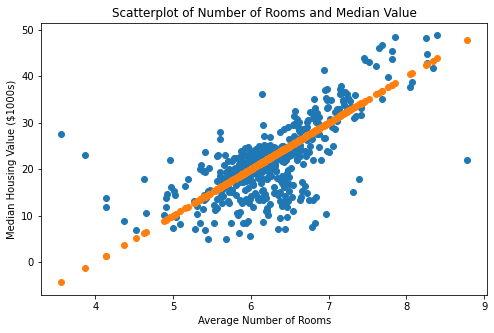

In [58]:
# slope, intercept = get_slope(housing['rm'], housing['medv']), get_intercept(housing['rm'], housing['medv'])
slope, intercept = 10, -40
fig1, ax1 = plot_scatter(rooms, 
    median_value, 
    x_label = "Average Number of Rooms",
    y_label = 'Median Housing Value ($1000s)',
    title = 'Scatterplot of Number of Rooms and Median Value');
ax1.scatter(rooms, slope*rooms + intercept)

# 2. Numerically Optimized Linear Regression

Since we know what the real Median Housing Value of all of these town, we can measure how far off our Linear Regression model is for our predictions. Of course, there will always be a little error, but we want to have as little as possible. 

The function `rm_medv_errors` will take in two arguments, a `slope` and an `intercept`. It will use these arguments to create a line that will give us predictions of the Median Value from the Average Number of Rooms, and will highlight the error corresponding to four of the points in red. There is nothing special about the four points, they were just chosen for clarity of display. 

Feel free to change the slope and intercept, we have it currently set to correspond to the line of best fit. Play around and see how these error bars change with different slopes and intercepts. 

In [ ]:
best_slope = get_slope(housing['rm'], housing['medv'])
best_intercept = get_intercept(housing['rm'], housing['medv'])

# Change these arguments to play around - replace the arguments in 'slope' and 'intercept' 
rm_medv_errors(slope = best_slope, intercept = best_intercept)

As introduced in lecture, we need one overall measure of the rough size of errors. Some lines have decently small errors, other lines might be downright silly. 

If you use any arbitrary line to calculate your estimates, then some of your errors are likely to be positive and others negative. To avoid cancellation when measuring the rough size of the errors, we will take the mean of the squared errors rather than the mean of the errors themselves.

The mean squared error of estimation is a measure of roughly how big the squared errors are, but its units are hard to interpret. Taking the square root yields the root mean square error **(RMSE)**, which is in the same units as the variable being predicted and therefore much easier to understand.

## Question 2.a

Remember in Lecture we introduced that the regression line is the unique straight line that minizes the RMSE among _all_ straight lines. Hence, in this question we're going to write a function that will calculate the RMSE of any line given a slope and an intercept (similar in use the `rm_medv_errors` function, but for all points).

We will be optimizing this function to find the best slope and intercept what minimizes the RMSE. Implement `rm_medv_rmse`, which given a slope and intercept will calculate the corresponding RMSE when using the Average Number of Rooms to predict the Median Household Value. 

We've filled out the first few lines of code for you below:


In [11]:
def rm_medv_rmse(any_slope, any_intercept): 
    """Calculates the RMSE from using a line with given slope and 
    intercept to predict MEDV from RM in housing_subset.csv"""
    x = housing['rm']
    y = housing['medv']
    fitted_vals = any_slope * x + any_intercept

    errors = ...    # Your code here...
    rmse = ...    # Your code here...
    return rmse

In [ ]:
check('q2a', rm_medv_rmse)

## Question 2.b 

Now that we have defined our "objective function" (this is just terminology used in optimization), we want to find the _argmin_, or the argument that minimizes said function. Luckily, we don't have to do it ourselves, and it is already implemented for you! 

The `minimize` function can be used to find the arguments of a function for which the functino returns its minimum value. Python uses a simiar trial-and-error approach, and will follow the echanges that lead to incrementally lower output values. 

The argument of minimize is a function that itself takes numerical arguments and returns a numerical value. For example, the function `rm_medv_rmse` takes a numerical slope and intercept as its arguments and returns the corresponding rmse. 

Use `minimize` in the next cell, and assign the result to the variable `best` and compare the results to your results from using the correlation coefficient.

In [ ]:
 # Your Code Here ...
best = ...
best

In [ ]:
check('q2b', best)

Notice anything neat? For that reason, sometimes the regression line is also called the "least squared line", since it minimizes the mean squared error. 

# 3. More Linear Regression

In the previous section, we've only been using lines make predictions, and you might think that's pretty naive. What if the data isn't in the shape of a line? Here, we'll talk about some non-linear regression, for when the data is not linear and potentially a little _curvy_... 


Take for example, the following scatterplot of the weighted distances to five Boston employment centres on the x-axis and Nitric Oxides concentration on the y-axis. 

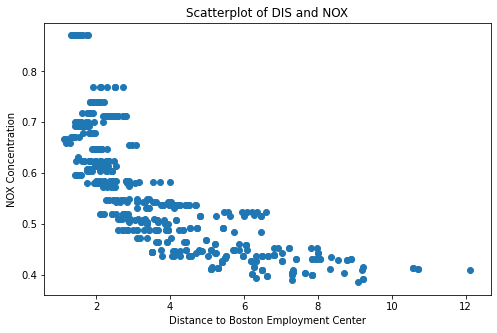

In [18]:
# Run this cell for visualization of slightly curvy data
plot_scatter(housing['dis'], housing['nox'],
    x_label = 'Distance to Boston Employment Center',
    y_label = 'NOX Concentration',
    title = 'Scatterplot of DIS and NOX');



Clearly it doesn't look like a straight line... it's more ... _curvy_

What if instead of fitting a line to this data, we could fit a parabola? If you recall from your Algebra 2 class, the equation for a parabola is:

$$ y = a(x-h)^2 + k \quad \text{where $a, h,$ and $k$ are all just some constant numbers.}$$ 

Well if they're just numbers, we could just keep guessing and checking until we find the best one (AKA the one that minimizes MSE), but we can also let Python find them for us!

You've actually done most of the work for this already by implementing numerically optimized linear regression


### Question 3.a

Implement the function `dn_parabola_mse` which takes in three arguments $a, h$ and $k$, and computes the root mean squared error when using the formula of a parabola to make predictions of the NOX Concentration from the Distance to Boston Employment Centers. 

In [ ]:
def dn_parabola_mse(a, h, k):
    """Calculates the RMSE from using a parabola with the parameters
    a, h, and k, on using DIS to predict NOX from housing_subset.csv"""
    x = housing['dis']
    y = housing['nox']
    # Your Code Here:
    fitted_values = ...
    ...
    rmse = ...
    return rmse

In [ ]:
check('q3a', dn_parabola_mse)

### Question 3.b

Now use `minimize` to find the best `a`,`h`, and `k` for the parabola and assign the ouput of `minimize` to `best_parabola`.

In [ ]:
best_parabola = ...
best_parabola

In [ ]:
check('q3b', best_parabola)

In the following cell, we've used your functions and outputs to plot the different fitted values between using Simple Linear Regression, and the NonLinear Regression (although technically it is still linear regression, bring this up in office hours if you're curious why). Great job so far! 

In [ ]:
dis = housing['dis']
nox = housing['nox']
best_slope = get_slope(dis, nox)
best_intercept = get_intercept(dis, nox)
fitted_vals = best_slope * dis + best_intercept

a, h, k = best_parabola
fitted_parabola_vals = a*(dis - h)**2 + k

fig, ax = plot_scatter(housing['dis'], housing['nox'],
    x_label = 'Distance to Boston Employment Center',
    y_label = 'NOX Concentration',
    title = 'Scatterplot of DIS and NOX')

ax.scatter(dis, fitted_vals, label = 'Best Line', color = 'orange')
ax.scatter(dis, fitted_parabola_vals, label = 'Best Parabola', color = 'red')
ax.legend();

You could also do this for a third-degree equation, or even higher up, all you would need to do is modify the starting equation, and `minimize` will find the best parameters to do so in the order of the function. 


# 4. Summary 


Yay! You're done with lab 4.  Hope this lab was helpful for some extra practice. If you have any questions or want to go further in depth on the material, please attend office hours which is held after lectures until 8PM. 

If you are submitting this lab for the Certificate of Completion, save this file which can be found under `File`.  Then run the cell below ONLY when you completed every question. Everything should return `True` which would indiciate everything is correct.


In [ ]:
checkall()